<a href="https://colab.research.google.com/github/vinigoia/MODELO-PARA-AVALIACAO-DE-RISCO-DE-CREDITO/blob/main/Modelo_para_Avalia%C3%A7%C3%A3o_de_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODELO PARA AVALIAÇÃO DE RISCO DE CRÉDITO**

_______________________________________________________________________________

## ***Se você está com pressa!!!***
________________________________________________________________________________

O objetivo deste estudo é criar um modelo de *Machine Learning* que consiga detectar a inadimplência de clientes para a instituição. Através de um conjunto de dados, realizou-se todos os procedimentos de preparação e análise, gerando uma *pipeline* base de comparação e otimização de parâmetros para o melhor modelo.

## ***Contextualizando...***

_______________________________________________________________________________

Mais do que nunca, a avaliação de risco de crédito é um assunto totalmente pertinente a ser discutido, uma vez que o Silicon Valley Bank, banco do Vale do Silício responsável pelo financiamento de startups e empresas de tecnologia, veio a declarar falência. Segundo a Tecmundo, o principal motivo foi o grande número de clientes inadimplentes, situação causada pela pandemia e recessão econômica. A previsão não é das melhores, já que espera-se inúmeros *lay-offs* em empresas, porém essa lacuna no mercado pode favorecer o surgimento de novas companias.
_______________________________________________________________________________

<p align=center>
<img src="https://img.ibxk.com.br/2023/03/13/13081751384038.jpg?ims=704x" width="80%"></p>

_______________________________________________________________________________
O uso de *Machine Learning* poderia ajudar bancos a preverem quais novos clientes seriam causadores de problemas, evitando assim a quebra da empresa? É isso que iremos analisar!

Mas o que poderia causar a inadimplência? Se formos analisar a clientela do SVB, possivelmente chegaríamos a conclusão de que empresas que trabalham com tecnologias emergentes, onde a experimentação é constante, tendem a possuir um número maior de inadimplentes, sendo potencializado em qualquer circunstância divergente da normal.

Porém, a cartela de clientes varia de banco para banco, então vamos analisar o que o nosso *dataset* nos traz.





## ***Sobre os Dados***
______________________________________________________________________________
Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas.

Neste momento, iremos importar as bibliotecas necessárias e transformar o *dataset* em questão em um *Dataframe*, salvando-o em uma varíavel. Logo após, verificaremos as primeiras entradas.

In [ ]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo de plotagem
sns.set_style('dark')

In [ ]:
# Leitura do arquivo .csv em um dataframe
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

# Visualização das primeiras entradas
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


Nessa primeira visualização, notamos que:

* A coluna `id` possui uma sequência de números e letras específicos para cada entrada;
* A coluna `target_default` é a nossa coluna alvo;
* A coluna `target_fraud` é uma outra coluna alvo utilizada por um outro sistema não relevante ao nosso estudo;
* As colunas `score_1` e `score_2` não são numéricas, ou seja, analisaremos futuramente como utilizá-la da melhor forma possível;
* A coluna `lat_lon` é uma lista contendo informações de latitude e longitude;
* A coluna `shipping_state` nos informa o estado onde foi feita a solicitação;
* A coluna `profile_tags` é um código aparentemente aleatório;
* A coluna `user_agent` nos indica em qual dispositivo foi feita a solicitação.



## ***Análise Exploratória***
______________________________________________________



### **O primeiro contato**
______________________________________________________

Antes de começar qualquer análise, iremos utilizar alguns métodos para verificação de informações básicas do *dataset*, como valores médios, valores ausentes, e os tipos de variáveis presentes.

In [ ]:
# Descrição geral do dataset
df.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,...,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,...,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,...,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,...,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Notamos que:
* A coluna `external_data_provider_credit_checks_last_2_year` possui valores zerados;
* A coluna `external_data_provider_email_seen_before`posui um valor de -999,00, possivelmente causada por um *outlier*;
* A coluna `reported_income` possui valores 'inf';
* Um pouco menos que a metade do número de colunas é composta por *strings*.

Teremos que tratar esses dados antes de treinar nosso modelo de *Machine Learning*.

In [ ]:
# Verificação dos tipos de variáveis presentes no dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

Nota-se que temos valores do tipo numérico e *strings*. Também nota-se a falta de valores em algumas colunas. Vamos verificar quantos valores únicos temos para definir o que pode ser um atributo categórico.

In [ ]:
df.nunique().sort_values()

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts    

Neste ponto, já podemos ir definindo o que poderemos excluir de colunas e quais métodos serão aplicados a cada coluna. Por exemplo, colunas com apenas uma variação de valor possivelmente não agregariam em nada nosso modelo. Colunas com até duas variações poderiam ser submetidas ao LabEncoder, não gerando problemas com hierarquia. Aplicaremos essas medidas no decorrer da nossa análise. A seguir, verificaremos a porcentagem de valores ausentes no *dataset*.

In [ ]:
# valores ausentes
print("\nVALORES AUSENTES:")
print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))


VALORES AUSENTES:
target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_def

A coluna `target_fraud`não será um problema, uma vez que não é nossa coluna alvo. Para as outras colunas com 50% ou mais de valores ausentes, cabe uma análise mais aprofundada se a eliminação afetaria o nosso modelo. Para o nosso caso, iremos eliminar todas as colunas as quais não temos uma informação concisa. Mas antes, verificaremos a porporção de nossa coluna alvo.

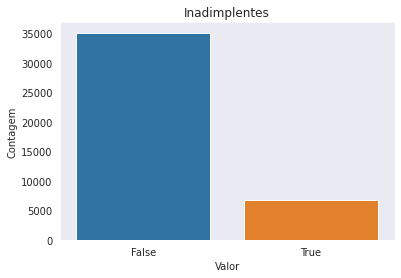

Proporção entre Inadimplentes no Dataset:
False    0.779556
True     0.148022
Name: target_default, dtype: float64


In [ ]:
# Proporção entre Inadimplentes no Dataset
fig, ax = plt.subplots()
sns.countplot(x='target_default', data=df, ax=ax)
ax.set_title("Inadimplentes")
ax.set_xlabel("Valor")
ax.set_ylabel("Contagem")
plt.show()

print("Proporção entre Inadimplentes no Dataset:")
print(df['target_default'].value_counts() / df.shape[0])

Antes de preparar nossos para o modelo de Machine Learning, iremos plotar alguns gráficos para geração de insights.

Na primeira plotagem, iremos verificar em qual estado o número de inadimplentes se concentra.

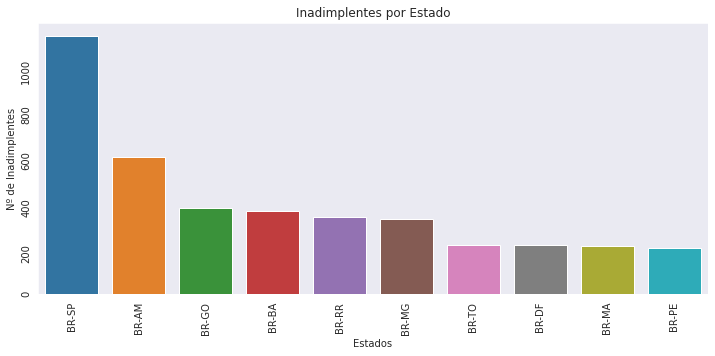

In [ ]:
# Configuração do plano de plotagem
fig, ax = plt.subplots(figsize=(12,5))

# Plotagem gráfico
estados = df.groupby(df.shipping_state)['target_default'].sum().sort_values(ascending=False)[0:10]
sns.barplot(x=estados.index, y=estados.values, ax=ax)
ax.tick_params(labelrotation=90)
ax.set_xlabel('Estados')
ax.set_ylabel('Nº de Inadimplentes')
ax.set_title('Inadimplentes por Estado')

plt.show()

Como observado, é no estado de São Paulo que se encontra o maior número de inadimplentes. Porvavelmente isso ocorre devido ao estado ter a maior concentração de pessoas e de negócios do país. O interessante é que, em segundo lugar, encontramos o estado de Amazonas. Possivelmente isso acontece devido ao estado ser um dos principais polos de tecnologia.

Abaixo verificaremos se há algum padrão relacionado aos sistemas operacionais dos celulares e o número de inadimplentes.

In [ ]:
# Criação de novo dataframe para plotagem
df_phones = [df['user_agent'],df['target_default']]
df_phones = pd.concat(df_phones, axis=1)
df_phones.dropna(inplace=True)

# split de strings
df_phones.user_agent=df_phones['user_agent'].apply(lambda x: x.split(';'))

# criação de uma series com o texto selecionado
so= []
for i in df_phones['user_agent']:
  so.append(i[0])

so = pd.Series(so)

# atualização do dataframe
df_phones = [df_phones,so]
df_phones = pd.concat(df_phones, axis=1)
df_phones.drop(columns='user_agent', inplace= True)

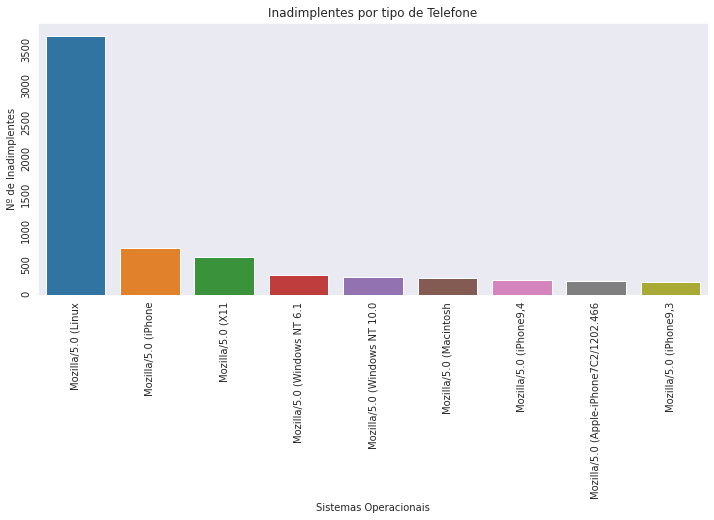

In [ ]:
# Configuração do plano de plotagem
fig, ax = plt.subplots(figsize=(12,5))

# Plotagem gráfico
phones = df_phones.groupby(df_phones[0])['target_default'].sum().sort_values(ascending=False)
sns.barplot(x=phones.index, y=phones.values, ax=ax)
ax.tick_params(labelrotation=90)
ax.set_xlabel('Sistemas Operacionais')
ax.set_ylabel('Nº de Inadimplentes')
ax.set_title('Inadimplentes por tipo de Telefone')

plt.show()

Observa-se que o maior número de inadimplentes possuem celular com o sistema operacional Android. Os aparelhos Androids possui um leque variado de preços, o que sugere que a inadimplência vem de diversas classes sociais diferentes. Iphones são produtos mais caros, os que nos indicaria uma sugestão de perfil de persona analisada aqui.

Abaixo, verificaremos se o número de inadimplentes correlaciona-se com os últimos empréstimos realizados.

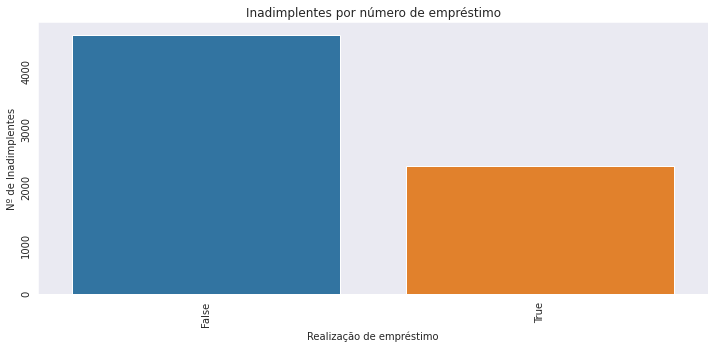

In [ ]:
# Configuração do plano de plotagem
fig, ax = plt.subplots(figsize=(12,5))

# Plotagem gráfico
empréstimos = df.groupby(df.last_amount_borrowed	> 0)['target_default'].sum().sort_values(ascending=False)
sns.barplot(x=empréstimos.index, y=empréstimos.values, ax=ax)
ax.tick_params(labelrotation=90)
ax.set_xlabel('Realização de empréstimo')
ax.set_ylabel('Nº de Inadimplentes')
ax.set_title('Inadimplentes por número de empréstimo')

plt.show()

Como observado, a maior inadimplência está presente nos clientes que não realizaram nenhum empréstimo. Chega a ser uma lógica estranha, uma vez que faz mais sentido uma pessoa que recorrentemente empresta dinheiro deixar de pagar do que uma pessoa que nunca emprestou nada do banco.

Essa é uma boa premissa para trabalharmos um modelo de Machine Learning que auxilie os bancos a detectarem essas anomalias. Abaixo, iniciaremos nosso tratamento de dados.

## ***Preparando o Terreno***
________________________________________________________________________________

### ***Redução de Dimensionalidade e Substituição de Valores***
________________________________________________________________________________


Agora, iremos realizar uma cópia do *dataset* e iniciar os tratamentos. Nesta primeira fase, iremos excluir algumas colunas e substituir alguns valores.

In [ ]:
# cópia do dataset
df_clean = df.copy()

# substituir inf por nan em reported_income 
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf,
                                                                  np.nan)

# descartar as colunas ids, target_fraud,
# external_data_provider_credit_checks_last_2_year e channel
df_clean.drop(labels=['ids', 'target_fraud',
                      'external_data_provider_credit_checks_last_2_year',
                      'channel'], axis=1, inplace=True)

#  substituir -999 em external_data_provider_email_seen_before por NaN
df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999.0,
             'external_data_provider_email_seen_before'] = np.nan

# elminar colunas sem informação aparente ou que demandam mais pesquisa
drop_var = ['reason', 'zip', 'job_name', 'external_data_provider_first_name',
            'lat_lon', 'shipping_zip_code', 'user_agent', 'profile_tags',
            'application_time_applied', 'email', 'marketing_channel',
            'profile_phone_number', 'shipping_state']
df_clean.drop(labels=drop_var, axis=1, inplace=True)

# elminar as entradas onde target_default é NaN
df_clean.dropna(subset=['target_default'], inplace=True)

Nesta etapa, iremos substituir os valores ausentes por 0, substituir as variáveis 'nan' das colunas numéricas pela média de cada coluna, e substituir as variáveis 'nan' das colunas categóricas pelos valores mais frequentes.

In [ ]:
from sklearn.impute import SimpleImputer

# seleção de colunas numéricas
num_df = df_clean.select_dtypes(exclude='object').columns

# seleção de colunas categóricas
cat_df = df_clean.select_dtypes(include='object').columns

# substituição de valores ausentes
df_clean.last_amount_borrowed.fillna(value=0, inplace=True)
df_clean.last_borrowed_in_months.fillna(value=0, inplace=True)
df_clean.n_issues.fillna(value=0, inplace=True)

# substituição de variáveis nan por valores médios
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:,num_df])

# substituição de variáveis nan categóricas por mais frequentes
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,cat_df])
df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:,cat_df])

Verifica-se abaixo que não temos mais valores ausentes.

In [ ]:
# verificar a quantidade de dados nulos
df_clean.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
last_amount_borrowed                               0
last_borrowed_in_months                            0
credit_limit                                       0
income                                             0
facebook_profile                                   0
state                                              0
real_state                                         0
ok_since                                           0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                    

### ***Padronização de dados***
________________________________________________________________________________


Como nossas colunas numéricas possuem valores com dimensões diferentes, aplicaremos a padronização para amenizar essas diferenças.

In [ ]:
# importação de biblioteca necessária
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
# criando uma cópia do df
scaled_df = df_clean.copy()

# padronizar as colunas numéricas
num_cols = scaled_df.drop('target_default',
                         axis=1).select_dtypes(exclude='object').columns

scaled_df[num_cols] = StandardScaler().fit_transform(scaled_df[num_cols].values)

### ***Feature Scaling* com *Label Encoder***
________________________________________________________________________________


Para as colunas categóricas, utilizaremos o LabEncoder.

In [ ]:
# criando uma cópia do df
encoded_df = scaled_df.copy()

# extrair as colunas categóricas
cat_cols = encoded_df.select_dtypes('object').columns

# codificar cada coluna categórica
for col in cat_cols:
  encoded_df[col+'_encoded'] = LabelEncoder().fit_transform(encoded_df[col])
  encoded_df.drop(col, axis=1, inplace=True)

### **Divisão dos dados de treino e validação**
________________________________________________________________________________

A seguir, importaremos as bibliotecas necessárias e divideremos nosso *dataset* em treino e teste.

In [ ]:
# importação de biblioteca necessária
from sklearn.model_selection import train_test_split

In [ ]:
# separar as variáveis independentes da variável alvo
X = encoded_df.drop('target_default', axis=1).select_dtypes(exclude='object')
y = encoded_df['target_default']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## ***Modelos de Machine Learning***
________________________________________________________________________________

Neste momento, importaremos as bibliotecas necessárias e contruiremos uma função de *baseline* que servirá de parâmetro de comparação para os outros modelos. Não estamos preocupados aqui em definir hiperparâmetros. A ideia é ter uma base de avaliação nos parâmetros *default*.

In [ ]:
# importação de bibliotecas necessárias
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [ ]:
# construindo função de avaliação do baseline
def val_model(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Arguments
        X: DataFrame, contém as variáveis independetes.
        y: Series, vetor contendo a variável alvo.
        clf: modelo classificador do Scikit-learn.
        quite: bool, indicando se a função deve imprimir os resultados ou não.

    # Returns
        float, média dos scores da cross-validation.
    """
    
    X = np.array(X)
    y = np.array(y)

    pipeline = make_pipeline(clf)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy')

    if quite == False:
        print("Acurácia: {:.4f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
    return scores.mean()

# criar baseline e ver desempenho
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Acurácia: 0.8404 (+/- 0.00)


Utilizando a métrica de acurácia e o algoritmo RandomForest, obtivemos um valor de 0,8381. Vamos agora testar agora com outros algoritmos e verificar os valores.

In [ ]:
# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
acc = []

# avaliar o desempenho
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    acc.append(val_model(X_train, y_train, clf, quite=True))

pd.DataFrame(data=acc, index=model, columns=['acc'])

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

,acc
RandomForestClassifier,0.840475
DecisionTreeClassifier,0.740092
SGDClassifier,0.836882
SVC,0.840167
LogisticRegression,0.839962
XGBClassifier,0.833904
LGBMClassifier,0.841947


Como mostrado na figura acima, o modelo que obtive a maior acurácia foi o LGBMClassifier, com 0,8387. Vamos observar os valores *default* de parâmetros utilizados.

In [ ]:
# verificando os parâmetros
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

Para conseguir um melhor resultado, iremos utilizar o GridSearch para nos auxiliar na escolha dos melhores parâmetros a partir de uma lista inicial.

In [ ]:
# instanciando o modelo
lgbm = LGBMClassifier(learning_rate=0.1)

# definindo os parâmetros a serem testados
param_grid = { 
  'subsample':[0.1, 0.5, 1.0],
 }

# identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lgbm, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# ver resultados
print("Melhor: {:.2f} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.84 para {'subsample': 0.1}


In [ ]:
# instanciando o modelo
lgbm = LGBMClassifier(learning_rate=0.1, subsample=0.1)

# definindo os parâmetros a serem testados
param_grid = { 
   'max_depth': [-1, 1, 2],
 }

# identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lgbm, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# ver resultados
print("Melhor: {:.2f} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.84 para {'max_depth': 2}


In [ ]:
# instanciando o modelo
lgbm = LGBMClassifier(learning_rate=0.1, subsample=0.1, max_depth=2)

# definindo os parâmetros a serem testados
param_grid = { 
   'n_estimators': [100, 500, 1000],
 }

# identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lgbm, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# ver resultados
print("Melhor: {:.2f} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.84 para {'n_estimators': 500}


In [ ]:
# instanciando o modelo
lgbm = LGBMClassifier(learning_rate=0.1, subsample=0.1, max_depth=2, n_estimators=500)

# definindo os parâmetros a serem testados
param_grid = { 
   'colsample_bytree': [0.1, 0.5, 1],
 }

# identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lgbm, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)

# ver resultados
print("Melhor: {:.2f} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.84 para {'colsample_bytree': 0.1}


Aqui temos nosso modelo com os melhores parâmetros.

In [ ]:
# instanciando o modelo e treinando o mesmo
ml_model = LGBMClassifier(learning_rate=0.1, 
                          subsample=0.1, 
                          max_depth=2, 
                          n_estimators=500,
                          colsample_bytree=0.1)

ml_model.fit(X_train, y_train)

LGBMClassifier(colsample_bytree=0.1, max_depth=2, n_estimators=500,
               subsample=0.1)

Abaixo, verificaremos nosssa acurácia final.

In [ ]:
# importação de biblioteca necessária
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
# previsões e probabilidades em cima do dataset de teste
y_pred = ml_model.predict(X_test)

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

Acurácia: 0.8436



Um ótimo valor. Porém, iremos verificar se a nossa performance melhora através do balanceamento dos dados da coluna alvo. Abaixo, realizaremos esse procedimento.

False    4670
True     4670
Name: target_default, dtype: int64


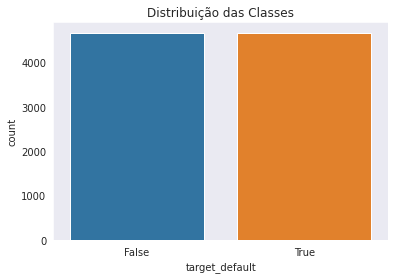

In [ ]:
# Importação de bibliotecas necessárias
from imblearn.under_sampling import RandomUnderSampler

# Usar técnica under-sampling para balanceamento
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# Plotar a nova distribuição de classes
fig, ax = plt.subplots()

sns.countplot(x=y_rus, ax=ax)

ax.set_title ("Distribuição das Classes")

plt.show()

Com os dados balanceados, iremos repetir os mesmos passos executados anteriormente e verificar os valores.

In [ ]:
# instanciar modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
acc = []
# avaliar o desempenho
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    acc.append(val_model(X_rus, y_rus, clf, quite=True))

pd.DataFrame(data=acc, index=model, columns=['acc'])

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,acc
RandomForestClassifier,0.635653
DecisionTreeClassifier,0.568737
SGDClassifier,0.541649
SVC,0.608887
LogisticRegression,0.612206
XGBClassifier,0.629015
LGBMClassifier,0.648929


In [ ]:
# verificando os parâmetros
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
# instanciando o modelo
lgbm = LGBMClassifier(learning_rate=0.1)

# definindo os parâmetros a serem testados
param_grid = { 
  'subsample':[0.1, 0.5, 1.0],
 }

# identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lgbm, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus, y_rus)

# ver resultados
print("Melhor: {:.2f} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.64 para {'subsample': 0.1}


In [ ]:
# instanciando o modelo
lgbm = LGBMClassifier(learning_rate=0.1, subsample=0.1)

# definindo os parâmetros a serem testados
param_grid = { 
   'max_depth': [-1, 1, 2],
 }

# identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lgbm, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus, y_rus)

# ver resultados
print("Melhor: {:.2f} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.65 para {'max_depth': 2}


In [ ]:
# instanciando o modelo
lgbm = LGBMClassifier(learning_rate=0.1, subsample=0.1, max_depth=2)

# definindo os parâmetros a serem testados
param_grid = { 
   'n_estimators': [100, 500, 1000],
 }

# identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lgbm, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus, y_rus)

# ver resultados
print("Melhor: {:.2f} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.66 para {'n_estimators': 100}


In [ ]:
# instanciando o modelo
lgbm = LGBMClassifier(learning_rate=0.1, subsample=0.1, max_depth=2, n_estimators=100)

# definindo os parâmetros a serem testados
param_grid = { 
   'colsample_bytree': [0.1, 0.5, 1],
 }

# identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(lgbm, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus, y_rus)

# ver resultados
print("Melhor: {:.2f} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.66 para {'colsample_bytree': 1}


In [ ]:
# instanciando o modelo e treinando o mesmo
ml_model = LGBMClassifier(learning_rate=0.1, 
                          subsample=0.1, 
                          max_depth=2, 
                          n_estimators=100,
                          colsample_bytree=1)

ml_model.fit(X_rus, y_rus)

LGBMClassifier(colsample_bytree=1, max_depth=2, subsample=0.1)

In [ ]:
# previsões e probabilidades em cima do dataset de teste
y_pred = ml_model.predict(X_test)

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

Acurácia: 0.6676



Apesar de balancearmos os dados alvo de nosso *dataset*, prática totalmente recomendada, obtivemos valores inferiores aos primeiros testes.

## ***Conclusão***
______________________________________________________________________________

Ao final dessa análise, podemos concluir que não há um procedimento padrão que garanta a melhor performance para seu modelo. Cada conjunto de dados possui suas características e se comporta de maneira diferente a cada método inferido. O balancemanto de dados poderia gerar resultados melhores se fosse aplicado em outro *dataset*. É claro que nesse estudo há margem para mais testes no setup de hiperparâmetros, o que poderia gerar resultados melhores, porém, para a métrica de acurácia definida, houve um *downgrade* se comparado aos dados desbalanceados.

Como assume-se a premissa que o *dataset* pode ter comportamentos diferentes dependendo das ações, seria interessante criar uma lista dos melhores resultados em cima de métricas e ranqueá-las conforme necessidade do cliente.
